<H1>Group 22: Predicting algerian forest fires<H1>

<H2>Introduction</H2>

We have all seen the rise in the number of forest fires in the past few years, and scientists and climate activists worldwide have raised their concerns. While natural in few ecosystems, these recent forest fires root their cause to the global rise in temperature and poor land management by authorities. Due to this, no matter whether a wildfire's origin is due to human intervention or natural, the drier climate makes it easy for a fire to spread over a region quite intensely.<br>
These fires are a clear call for change because they can result in irreparable damage to forest ecosystems. The gases released due to these fires travel to the city, causing health crises. While governments worldwide introduce initiatives to promote sustainable practices and the general public abides by them, it is also vital for scientists to know which forests are prone to fires. Through this project, we intend to answer the question: "Can we predict a wildfire in this Algerian forests based on given data?"<br>

<H4>Data set used:</H4>
Algerian forest fires: https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv<br>
This data set has fourteen variables, thirteen of which are numerical, and one is categorical, along with 243 observations.

<H2>Loading the data set into R and wrangling it</H2>

In [27]:
install.packages("skimr")
install.packages("GGally")
library(tidyverse)
library(repr)
library(GGally)
library(tidymodels)
library(skimr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [28]:
# URL that contains the dataframe that we want to examine
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv"

# Reading dataframe into R
algerian_forest_fires <- read_csv(url,skip = 1)

# Examining the data frame
# algerian_forest_data

# Inspecting the parsing failures

# algerian_forest_fires[123, 1:14] -- Empty row between two data sets
 
# algerian_forest_fires[168, 1:14] -- Needs to be fixed

algerian_forest_fires[168, 10] = '14.6'
algerian_forest_fires[168, 11] =  '9'
algerian_forest_fires[168, 12] =  '12.5'
algerian_forest_fires[168, 13] =  '10.4'
algerian_forest_fires[168, 14] =  "fire"

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_character(),
  Temperature = col_character(),
  RH = col_character(),
  Ws = col_character(),
  Rain = col_character(),
  FFMC = col_character(),
  DMC = col_character(),
  DC = col_character(),
  ISI = col_character(),
  BUI = col_character(),
  FWI = col_character(),
  Classes = col_character()
)

Warning message:
“2 parsing failures.
row col   expected     actual                                                                                                       file
123  -- 14 columns 1 columns  'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
168  -- 14 columns 13 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
”


<H3>Upon examination we infer that:</H3>
    <li>File that we read contains 2 dataframes.</li>
    <li>The dataset's column types aren't parsed correctly</li>
<p>To extract the target data frame, we will split the file into two dataframes, tidy both of them, and lastly join them.</p>

<H4>Extracting and tidying Bejaja region data set</H4>

In [29]:
# Retrieving the bejaja data set
bejaja_forest <- slice(algerian_forest_fires, 2:122)

#Fixing the collumn types of the numerical variables
bejaja_forest_data <- bejaja_forest %>% 
    select(day:FWI) %>% 
    map_df(as.double) 

# Selecting the observation class data
bejaja_forest_fires <- bejaja_forest %>% 
    select(Classes) 

# Joining numerical variable and observation class data 
bejaja_forest_tidy <- cbind(bejaja_forest_data,bejaja_forest_fires)
#head(bejaja_forest_tidy)

<H4>Extracting and tidying Sidi-Bel region data set</H4>

In [30]:
#Finding the number of rows in the original dataset
number_of_rows <- nrow(algerian_forest_fires)

# Retrieving the sidi-bel data set
sidi_bel_forest <- slice(algerian_forest_fires, 125:number_of_rows)


#Fixing the collumn types of the numerical variables
sidi_bel_forest_data <- sidi_bel_forest %>% 
    select(day:FWI) %>% 
    map_df(as.double)


# Selecting the observation class data
sidi_bel_forest_fires <- sidi_bel_forest %>% 
    select(Classes)

# Joining numerical variable and observation class data 
sidi_bel_forest_tidy <- cbind(sidi_bel_forest_data,sidi_bel_forest_fires)

<H4>Joining our two dataframes</H4> 

In [31]:
algerian_forest_fires_tidy <- full_join(bejaja_forest_tidy, sidi_bel_forest_tidy)
algerian_forest_fires_tidy

# The resulting data frame is tidy and ready for the further analysis


Joining, by = c("day", "month", "year", "Temperature", "RH", "Ws", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI", "Classes")



day month year Temperature RH Ws Rain FFMC DMC  DC    ISI  BUI  FWI 
1    2  6     2012 29          61 13  1.3 64.4  4.1  7.6  1.0   3.9  0.4
2    3  6     2012 26          82 22 13.1 47.1  2.5  7.1  0.3   2.7  0.1
3    4  6     2012 25          89 13  2.5 28.6  1.3  6.9  0.0   1.7  0.0
4    5  6     2012 27          77 16  0.0 64.8  3.0 14.2  1.2   3.9  0.5
5    6  6     2012 31          67 14  0.0 82.6  5.8 22.2  3.1   7.0  2.5
6    7  6     2012 33          54 13  0.0 88.2  9.9 30.5  6.4  10.9  7.2
7    8  6     2012 30          73 15  0.0 86.6 12.1 38.3  5.6  13.5  7.1
8    9  6     2012 25          88 13  0.2 52.9  7.9 38.8  0.4  10.5  0.3
9   10  6     2012 28          79 12  0.0 73.2  9.5 46.3  1.3  12.6  0.9
10  11  6     2012 31          65 14  0.0 84.5 12.5 54.3  4.0  15.8  5.6
11  12  6     2012 26          81 19  0.0 84.0 13.8 61.4  4.8  17.7  7.1
12  13  6     2012 27          84 21  1.2 50.0  6.7 17.0  0.5   6.7  0.2
13  14  6     2012 30          78 20  0.5 59.0  4.6  7.8  1.0   4.4  0.4
14  15  6     2012 28          80 17  3.1 49.4  3.0  7.4  0.4   3.0  0.1
15  16  6     2012 29          89 13  0.7 36.1  1.7  7.6  0.0   2.2  0.0
16  17  6     2012 30          89 16  0.6 37.3  1.1  7.8  0.0   1.6  0.0
17  18  6     2012 31          78 14  0.3 56.9  1.9  8.0  0.7   2.4  0.2
18  19  6     2012 31          55 16  0.1 79.9  4.5 16.0  2.5   5.3  1.4
19  20  6     2012 30          80 16  0.4 59.8  3.4 27.1  0.9   5.1  0.4
20  21  6     2012 30          78 14  0.0 81.0  6.3 31.6  2.6   8.4  2.2
21  22  6     2012 31          67 17  0.1 79.1  7.0 39.5  2.4   9.7  2.3
22  23  6     2012 32          62 18  0.1 81.4  8.2 47.7  3.3  11.5  3.8
23  24  6     2012 32          66 17  0.0 85.9 11.2 55.8  5.6  14.9  7.5
24  25  6     2012 31          64 15  0.0 86.7 14.2 63.8  5.7  18.3  8.4
25  26  6     2012 31          64 18  0.0 86.8 17.8 71.8  6.7  21.6 10.6
26  27  6     2012 34          53 18  0.0 89.0 21.6 80.3  9.2  25.8 15.0
27  28  6     2012 32          55 14  0.0 89.1 25.5 88.5  7.6  29.7 13.9
28  29  6     2012 32          47 13  0.3 79.9 18.4 84.4  2.2  23.8  3.9
29  30  6     2012 33          50 14  0.0 88.7 22.9 92.8  7.2  28.3 12.9
30   1  7     2012 29          68 19  1.0 59.9  2.5  8.6  1.1   2.9  0.4
⋮   ⋮   ⋮     ⋮    ⋮           ⋮  ⋮  ⋮    ⋮    ⋮    ⋮     ⋮    ⋮    ⋮   
214  1  9     2012 29          86 16 0.0  37.9  0.9   8.2  0.1  1.4  0.0
215  2  9     2012 28          67 19 0.0  75.4  2.9  16.3  2.0  4.0  0.8
216  3  9     2012 28          75 16 0.0  82.2  4.4  24.3  3.3  6.0  2.5
217  4  9     2012 30          66 15 0.2  73.5  4.1  26.6  1.5  6.0  0.7
218  5  9     2012 30          58 12 4.1  66.1  4.0   8.4  1.0  3.9  0.4
219  6  9     2012 34          71 14 6.5  64.5  3.3   9.1  1.0  3.5  0.4
220  7  9     2012 31          62 15 0.0  83.3  5.8  17.7  3.8  6.4  3.2
221  8  9     2012 30          88 14 0.0  82.5  6.6  26.1  3.0  8.1  2.7
222  9  9     2012 30          80 15 0.0  83.1  7.9  34.5  3.5 10.0  3.7
223 10  9     2012 29          74 15 1.1  59.5  4.7   8.2  0.8  4.6  0.3
224 11  9     2012 30          73 14 0.0  79.2  6.5  16.6  2.1  6.6  1.2
225 12  9     2012 31          72 14 0.0  84.2  8.3  25.2  3.8  9.1  3.9
226 13  9     2012 29          49 19 0.0  88.6 11.5  33.4  9.1 12.4 10.3
227 14  9     2012 28          81 15 0.0  84.6 12.6  41.5  4.3 14.3  5.7
228 15  9     2012 32          51 13 0.0  88.7 16.0  50.2  6.9 17.8  9.8
229 16  9     2012 33          26 13 0.0  93.9 21.2  59.2 14.2 22.4 19.3
230 17  9     2012 34          44 12 0.0  92.5 25.2  63.3 11.2 26.2 17.5
231 18  9     2012 36          33 13 0.1  90.6 25.8  77.8  9.0 28.2 15.4
232 19  9     2012 29          41  8 0.1  83.9 24.9  86.0  2.7 28.9  5.6
233 20  9     2012 34          58 13 0.2  79.5 18.7  88.0  2.1 24.4  3.8
234 21  9     2012 35          34 17 0.0  92.2 23.6  97.3 13.8 29.4 21.6
235 22  9     2012 33          64 13 0.0  88.9 26.1 106.3  7.1 32.4 13.7
236 23  9     2012 35          56 14 0.0  89.0 29.4 115.6  7.5

In [32]:
# Choosing the split % 
# When choosing a split percentage, you are forced to decide between a more accurate evaluation of your model's performance and the better-trained model. 
# We choose to split our data set into 75% of training data and 25% of testing data. We reasoned that since our data set is not large, allocating more observations to the testing data set would drastically decrease our model's performance. 

set.seed(2021)
# Splitting the data set
algerian_forest_fires_tidy <- mutate(algerian_forest_fires_tidy, Classes = as.factor(Classes))
forest_split <- initial_split(algerian_forest_fires_tidy, prop = 0.75, strata = Classes)
forest_train <- training(forest_split)
forest_test <- testing(forest_split)

# Specifying the summary function
my_skim <- skim_with(numeric = sfl(median, mean,  sd, min, max),
                                   append = FALSE)

# Creating summary table
summary_df <- my_skim(forest_train) %>% 
    tibble::as_tibble() %>% 
    select(skim_variable:numeric.max)
summary_df

skim_variable n_missing complete_rate factor.ordered factor.n_unique
1  Classes       0         1             FALSE           2             
2  day           0         1                NA          NA             
3  month         0         1                NA          NA             
4  year          0         1                NA          NA             
5  Temperature   0         1                NA          NA             
6  RH            0         1                NA          NA             
7  Ws            0         1                NA          NA             
8  Rain          0         1                NA          NA             
9  FFMC          0         1                NA          NA             
10 DMC           0         1                NA          NA             
11 DC            0         1                NA          NA             
12 ISI           0         1                NA          NA             
13 BUI           0         1                NA          NA             
14 FWI           0         1                NA          NA             
   factor.top_counts numeric.median numeric.mean numeric.sd numeric.min
1  fir: 104, not: 79     NA                   NA        NA      NA     
2  NA                  16.0           16.2622951  8.723283     1.0     
3  NA                   8.0            7.5519126  1.122343     6.0     
4  NA                2012.0         2012.0000000  0.000000  2012.0     
5  NA                  32.0           31.9125683  3.558461    22.0     
6  NA                  64.0           62.4153005 14.480081    24.0     
7  NA                  15.0           15.4699454  2.751208     6.0     
8  NA                   0.0            0.7868852  1.965567     0.0     
9  NA                  83.8           77.7551913 14.384399    28.6     
10 NA                  11.1           14.8459016 13.145946     0.9     
11 NA                  32.2           49.5109290 48.925393     6.9     
12 NA                   3.5            4.7032787  4.044735     0.0     
13 NA                  11.8           16.7945355 14.968618     1.4     
14 NA                   4.7            7.0426230  7.511803     0.0     
   numeric.max
1      NA     
2    31.0     
3     9.0     
4  2012.0     
5    42.0     
6    89.0     
7    26.0     
8    16.8     
9    96.0     
10   65.9     
11  220.4     
12   19.0     
13   68.0     
14   31.1

<h4> Imbalance of class labels </h4>
<p> After a quick look at a summary table, we can see that there are more fire class labels than non-fire observations. <br>
    We believe that this is not an issue since the 30% difference in the number of observations does not warrant upsampling the data. <br>
    On the contrary, upsampling the data in this example would probably result in worse performance since each non-fire observation <br>
    would gain more weight, making our model favour non-fire observations.<p/>

<H3>Ploting our data </H3>

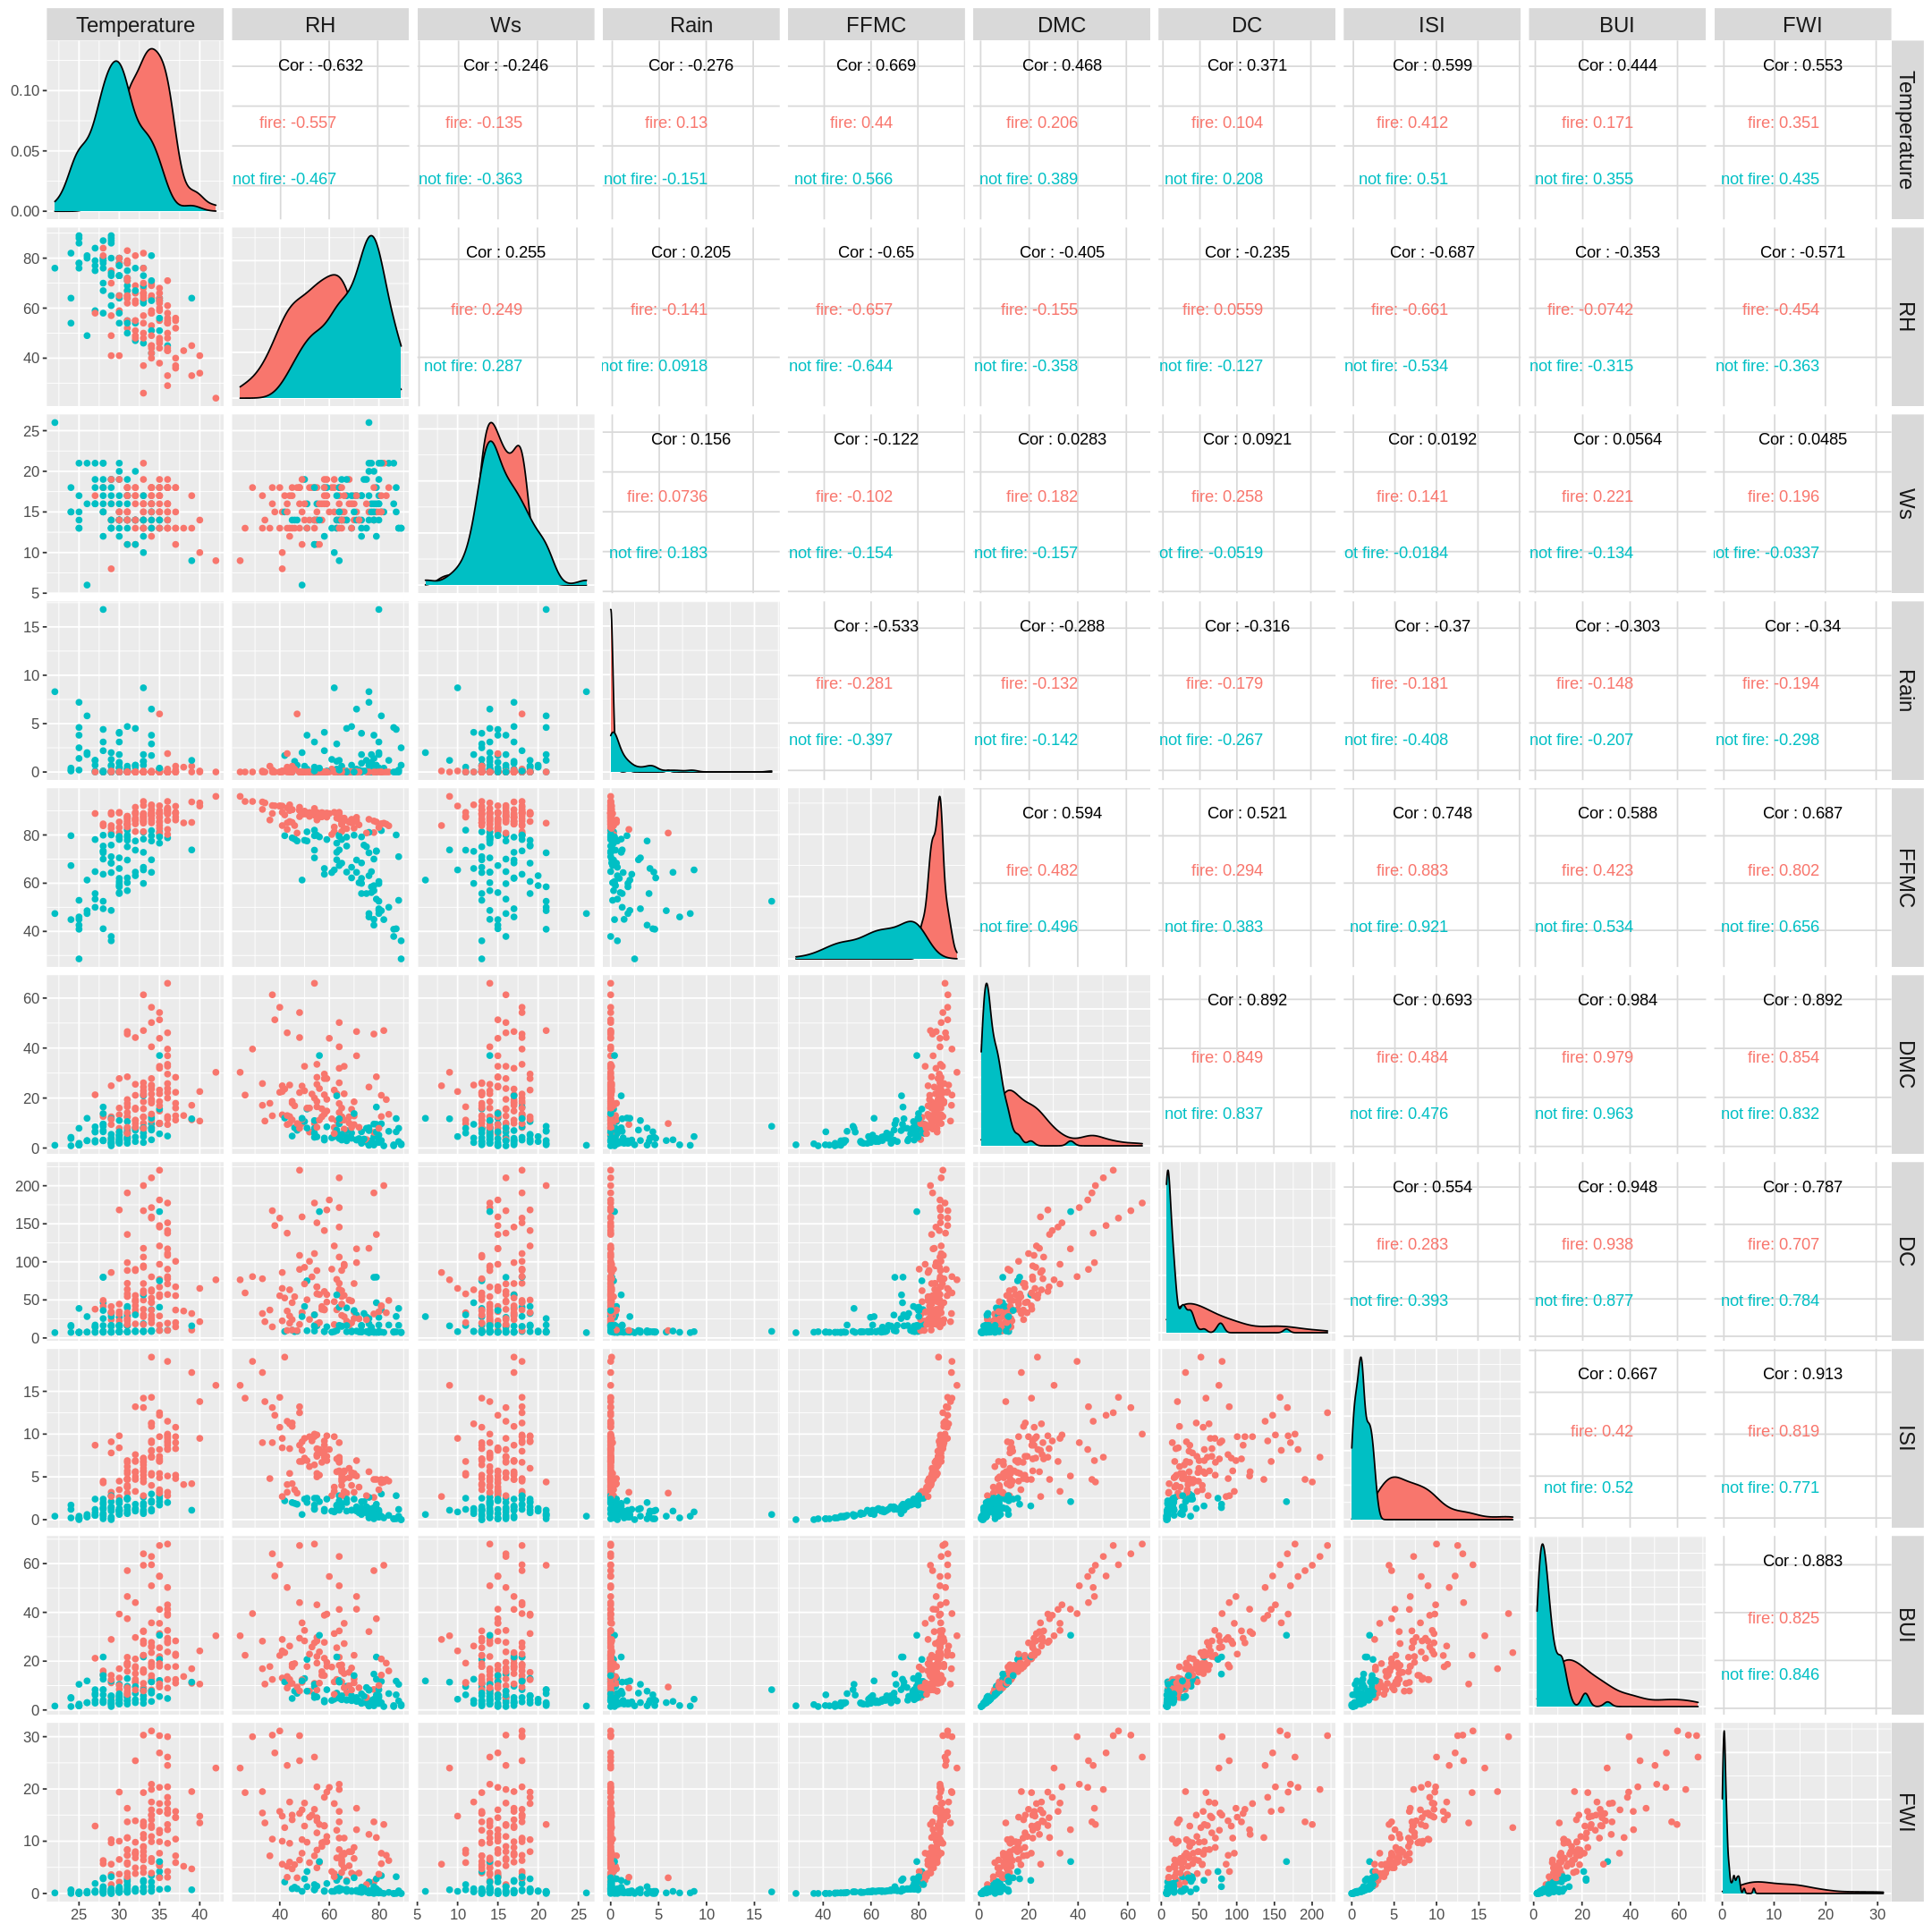

In [33]:
# Plot options
options(repr.plot.width = 18, repr.plot.height= 18)
# Removing the date data
forest_train <- select(forest_train,Temperature:Classes)
# We are using ggpairs to plot our variables against each other and see correlation
ggpairs(forest_train, columns = c("Temperature","RH","Ws","Rain","FFMC","DMC","DC","ISI","BUI","FWI"),
        aes(colour = Classes))  +
        theme(text = element_text(size = 18),
              axis.text = element_text(size = 10))


<H2>Methods</H2>

* The question we seek to answer falls under the classification category. To answer it, we have divided our dataset into a training set and a testing set
* We will use Duff Moisture Content (DMC) and Initial Spread Index (ISI) as predictors in the training set and tune our K-nearest classifier based on outcome data.
* We performed cross validation to ensure that our model does not overfit and help understand our model's accuracy. 
* We determine the value of K here by choosing the result which had the highest accuracy. The K value obtained was 5.
* This model will then be used to predict our test set's class labels and thereby determine its accuracy.
* We chose these predictors precisely because, during our EDA, we found that these variables have the highest correlation (**TBD**). 
* DMC represents the fuel moisture of decomposed organic material present on the forest floor. ISI estimates the spread potential by integrating the moisture content of the forest and the windspeed at the given time.
* They are derived from variables such as temperature, rain, wind speed, and humidity calculated and predicted by scientists daily.
* For our visualization, we will create decision boundary plots for each combination of our predictors.

In [37]:
set.seed(2021)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")

ff_recipe <- recipe(Classes ~  ISI + DMC , data = forest_train) %>% 
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

ff_vfold <- vfold_cv(forest_train, v = 5, strata = Classes)

knn_results <- workflow() %>%
    add_recipe(ff_recipe) %>%
    add_model(knn_spec) %>%
    tune_grid(resamples = ff_vfold, grid = c(1:10)) %>%
    collect_metrics()

best_k <- knn_results %>% 
    filter(.metric == "accuracy") %>% 
    arrange(desc(mean)) %>% 
    slice(1) %>% 
    select(neighbors) %>% 
    pull()

best_k

ff_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")


ff_fit <- workflow() %>% 
    add_recipe(ff_recipe) %>% 
    add_model(ff_knn) %>% 
    fit(data = forest_train)

ff_predictions <- predict(ff_fit, forest_test) %>% 
    bind_cols(forest_test)


ff_metrics <- ff_predictions %>% 
    metrics(truth = Classes, estimate = .pred_class)

ff_metrics

[1] 5

.metric  .estimator .estimate
1 accuracy binary     0.9833333
2 kap      binary     0.9662162

In [35]:
isi_seq <- seq(from = min(algerian_forest_fires_tidy$ISI, na.rm = TRUE), 
             to = max(algerian_forest_fires_tidy$ISI, na.rm = TRUE), 
             length.out = 100)
ffmc_seq <- seq(from = min(algerian_forest_fires_tidy$DMC, na.rm = TRUE), 
             to = max(algerian_forest_fires_tidy$DMC, na.rm = TRUE), 
             length.out = 100)

grid_points <-  expand.grid(ISI = isi_seq,
                            DMC = ffmc_seq)

grid_predicted <- ff_fit %>% 
    predict(grid_points) %>% 
    bind_cols(grid_points) 


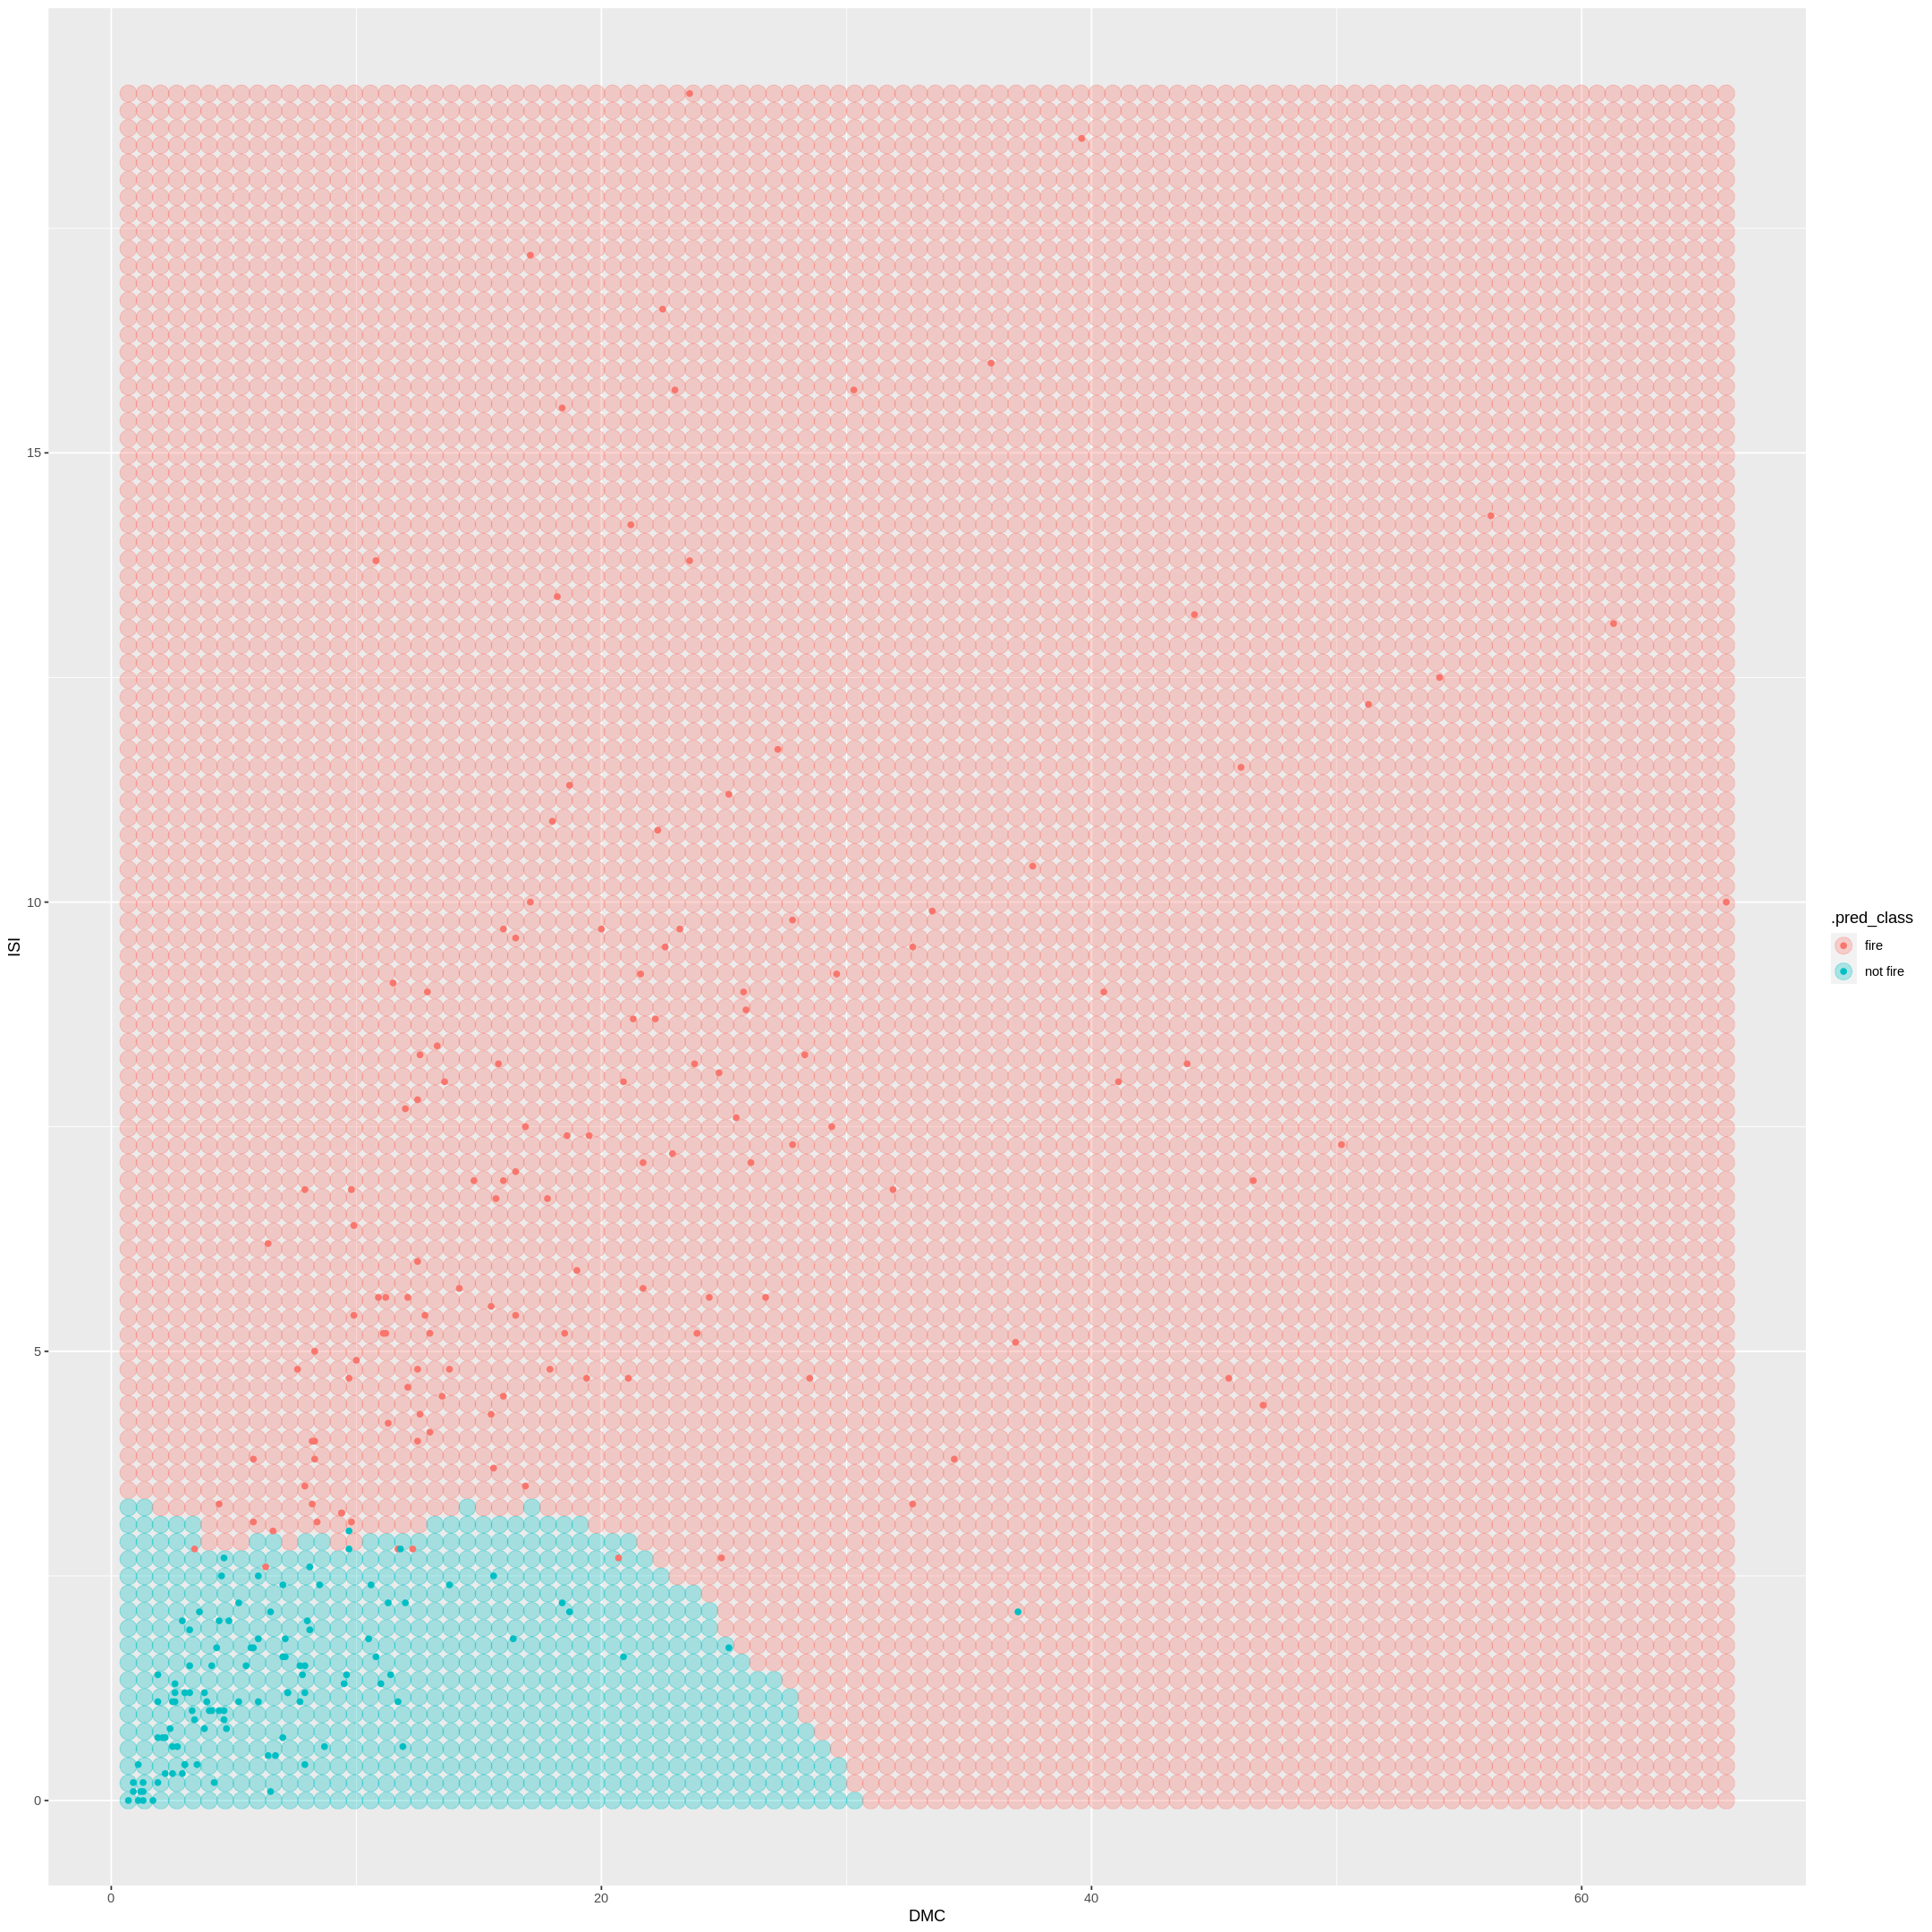

In [36]:
bui_isi_boundary_plot <- ggplot(grid_predicted, aes(x = DMC, y = ISI, color = .pred_class)) +
    geom_point(alpha = 0.3,size = 5.) +
    geom_point(data = algerian_forest_fires_tidy, aes(x = DMC, y = ISI, color = Classes))
bui_isi_boundary_plot


<H2>Expected Outcomes and Significance</H2>

We expect to see a correlation between moderate to high values of the mentioned predictors and fire occurrence.<br>
Most importantly, this can help firefighters understand whether there is a possibility of a forest fire passing onto a different region (given region's predictors) and strategize accordingly.
Our project was trained and tested using a relatively small dataset of a particular region in Algeria. A question arises whether our model is sufficient to predict wildfires in a different part of the world, or does it need to be trained on more data?
